In [38]:
import pandas as pd

In [39]:
crime = pd.read_csv("crime_preprocessed_rf")

In [40]:
crime

,DOW,HourofDay,DaysAgo,OffenseDate,CENSUS_TRACT,CENSUS_BLOCK,LAT,LON,ExtractedMonth,ExtractedDay,UCRdesc_numeric,OffenseYear_numeric,TimeBlock_numeric
0,6,23,1101,2021-06-05 04:41:00,Census Tract 1013,Block 2000,41.483143,-81.766893,6,5,12,3,1
1,7,17,722,2022-06-18 22:23:00,Census Tract 1070,Block 2004,41.434211,-81.683311,6,18,3,4,0
2,7,8,1401,2020-08-08 13:00:00,Census Tract 1176,Block 3001,41.579019,-81.556672,8,8,12,2,2
3,5,2,1452,2020-06-18 07:20:00,Census Tract 1221,Block 2002,41.449064,-81.564849,6,18,26,2,3
4,7,3,722,2022-06-18 08:22:00,Census Tract 1117,Block 1000,41.530355,-81.634045,6,18,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374716,3,21,2343,2018-01-10 02:00:00,Census Tract 1077.01,Block 2050,41.497169,-81.679864,1,10,26,0,1
374717,6,16,2347,2018-01-05 21:00:00,Census Tract 1016.03,Block 2011,41.474377,-81.749953,1,5,4,0,0
374718,3,1,2350,2018-01-02 06:00:00,Census Tract 1235.01,Block 1000,41.464605,-81.782971,1,2,3,0,3
374719,2,23,2351,2018-01-02 04:00:00,Census Tract 1179,Block 1000,41.556780,-81.550443,1,2,24,0,1


In [41]:
#violent_crime_list = [3, 10, 27, 21, 17, 20, 22, 15]
#violent_crime = crime[crime['UCRdesc_numeric'].isin(violent_crime_list)]

In [42]:
crime

,DOW,HourofDay,DaysAgo,OffenseDate,CENSUS_TRACT,CENSUS_BLOCK,LAT,LON,ExtractedMonth,ExtractedDay,UCRdesc_numeric,OffenseYear_numeric,TimeBlock_numeric
0,6,23,1101,2021-06-05 04:41:00,Census Tract 1013,Block 2000,41.483143,-81.766893,6,5,12,3,1
1,7,17,722,2022-06-18 22:23:00,Census Tract 1070,Block 2004,41.434211,-81.683311,6,18,3,4,0
2,7,8,1401,2020-08-08 13:00:00,Census Tract 1176,Block 3001,41.579019,-81.556672,8,8,12,2,2
3,5,2,1452,2020-06-18 07:20:00,Census Tract 1221,Block 2002,41.449064,-81.564849,6,18,26,2,3
4,7,3,722,2022-06-18 08:22:00,Census Tract 1117,Block 1000,41.530355,-81.634045,6,18,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374716,3,21,2343,2018-01-10 02:00:00,Census Tract 1077.01,Block 2050,41.497169,-81.679864,1,10,26,0,1
374717,6,16,2347,2018-01-05 21:00:00,Census Tract 1016.03,Block 2011,41.474377,-81.749953,1,5,4,0,0
374718,3,1,2350,2018-01-02 06:00:00,Census Tract 1235.01,Block 1000,41.464605,-81.782971,1,2,3,0,3
374719,2,23,2351,2018-01-02 04:00:00,Census Tract 1179,Block 1000,41.556780,-81.550443,1,2,24,0,1


In [43]:
crime['OffenseDate'] = pd.to_datetime(crime['OffenseDate'], errors='coerce')
# Step 2: Set 'OffenseDate' as the index
crime.set_index('OffenseDate', inplace=True)

In [44]:
# Step 3: Now group by 'CENSUS_TRACT' and resample using the 'OffenseDate' index
crime_time_series = crime.groupby(['CENSUS_TRACT', pd.Grouper(freq='W')]).agg({
    'DOW': 'mean',  
    'HourofDay': 'mean',
    'ExtractedMonth': 'mean',
    'ExtractedDay': 'mean',
}).reset_index()

# Step 4: Create the 'Crime_Count' feature based on size (count of crimes)
crime_time_series['Crime_Count_W'] = crime.groupby(['CENSUS_TRACT', pd.Grouper(freq='W')]).size().values

# Now the 'violent_crime_time_series' contains the aggregated features and 'Crime_Count'
crime_time_series

,CENSUS_TRACT,OffenseDate,DOW,HourofDay,ExtractedMonth,ExtractedDay,Crime_Count_W
0,Census Tract 1011.01,2018-01-07,2.000000,6.000000,1.0,1.000000,2
1,Census Tract 1011.01,2018-01-14,6.000000,15.400000,1.0,12.200000,5
2,Census Tract 1011.01,2018-01-21,1.333333,4.000000,1.0,19.000000,3
3,Census Tract 1011.01,2018-01-28,4.000000,18.750000,1.0,24.250000,4
4,Census Tract 1011.01,2018-02-04,6.142857,14.571429,2.0,2.285714,7
...,...,...,...,...,...,...,...
40484,Census Tract 9809,2022-11-13,3.000000,11.000000,11.0,8.000000,1
40485,Census Tract 9809,2022-11-27,4.000000,22.000000,11.0,24.000000,2
40486,Census Tract 9809,2022-12-11,2.000000,15.000000,12.0,5.000000,1
40487,Census Tract 9809,2022-12-18,4.200000,13.000000,12.0,14.400000,5


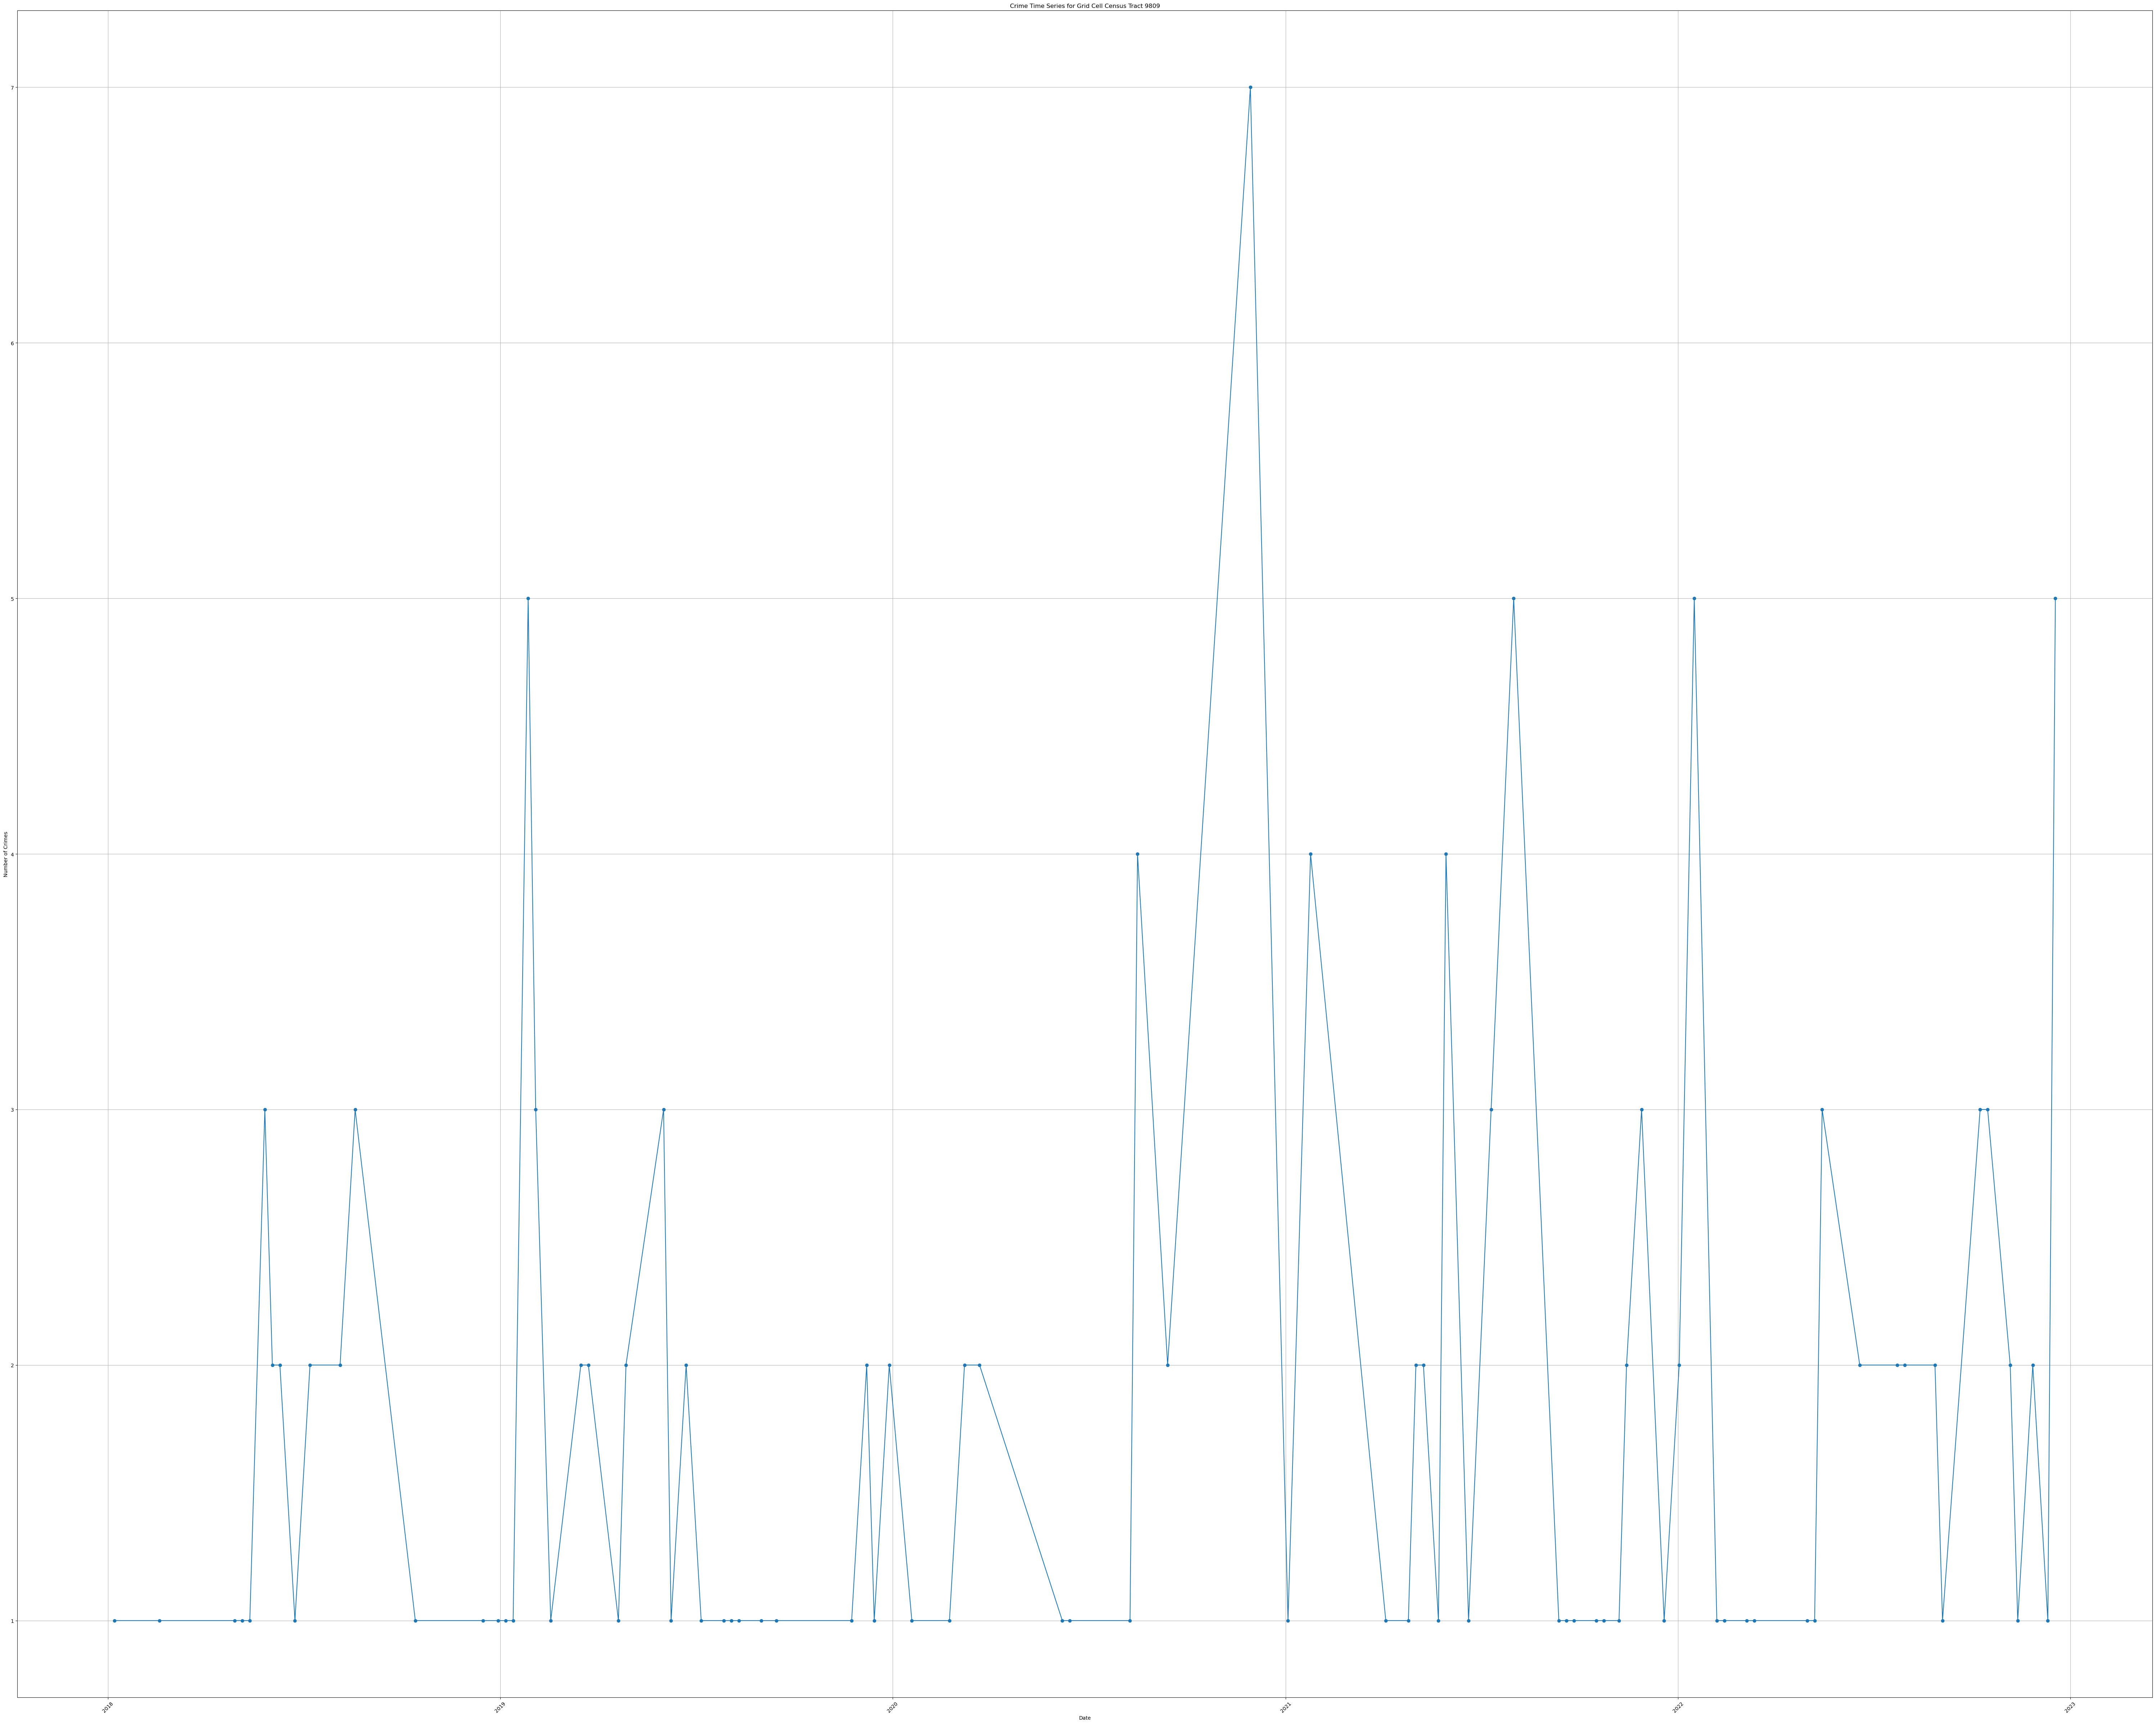

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data for a specific CENSUS_TRACT, e.g., (x, y)
tract = 'Census Tract 9809'
time_series_data = crime_time_series[crime_time_series['CENSUS_TRACT'] == tract]

# Plot the time series for that CENSUS_TRACT
plt.figure(figsize=(60, 48))
plt.plot(time_series_data['OffenseDate'], time_series_data['Crime_Count_W'], marker='o')
plt.title(f'Crime Time Series for Grid Cell {tract}')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()

plt.show()

In [46]:
!pip install xgboost

In [47]:
# feature encode CENSUS_TRACT
from sklearn.preprocessing import LabelEncoder

crime_time_series['CENSUS_TRACT'] = crime_time_series['CENSUS_TRACT'].apply(lambda x: str(x))

le = LabelEncoder()
crime_time_series['CENSUS_TRACT'] = le.fit_transform(crime_time_series['CENSUS_TRACT'])

In [48]:
census_tract_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings
print("CENSUS_TRACT to Encoded Label Mappings:")
for original, encoded in census_tract_mapping.items():
    print(f"{original} -> {encoded}")

CENSUS_TRACT to Encoded Label Mappings:
Census Tract 1011.01 -> 0
Census Tract 1011.02 -> 1
Census Tract 1012.01 -> 2
Census Tract 1013 -> 3
Census Tract 1014 -> 4
Census Tract 1015.01 -> 5
Census Tract 1016.03 -> 6
Census Tract 1017 -> 7
Census Tract 1018 -> 8
Census Tract 1019.01 -> 9
Census Tract 1021.01 -> 10
Census Tract 1021.02 -> 11
Census Tract 1022 -> 12
Census Tract 1023 -> 13
Census Tract 1024.01 -> 14
Census Tract 1024.02 -> 15
Census Tract 1027 -> 16
Census Tract 1028 -> 17
Census Tract 1029 -> 18
Census Tract 1033 -> 19
Census Tract 1035 -> 20
Census Tract 1036.02 -> 21
Census Tract 1038 -> 22
Census Tract 1044 -> 23
Census Tract 1048 -> 24
Census Tract 1051 -> 25
Census Tract 1053 -> 26
Census Tract 1054 -> 27
Census Tract 1055 -> 28
Census Tract 1056.02 -> 29
Census Tract 1057 -> 30
Census Tract 1059 -> 31
Census Tract 1061 -> 32
Census Tract 1062 -> 33
Census Tract 1065 -> 34
Census Tract 1066 -> 35
Census Tract 1068 -> 36
Census Tract 1069 -> 37
Census Tract 1070 -> 3

In [49]:
crime_time_series.columns

Index(['CENSUS_TRACT', 'OffenseDate', 'DOW', 'HourofDay', 'ExtractedMonth',
       'ExtractedDay', 'Crime_Count_W'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split

features = ['DOW', 'HourofDay', 'ExtractedMonth', 'ExtractedDay', 'CENSUS_TRACT']

X = crime_time_series[features]
y = crime_time_series['Crime_Count_W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          Feature  Importance
4    CENSUS_TRACT    0.449630
0             DOW    0.207533
1       HourofDay    0.145143
3    ExtractedDay    0.116952
2  ExtractedMonth    0.080742
Mean Absolute Error: 3.1701111385527287
Root Mean Squared Error: 4.41901912556471
R² Score: 0.5453740269536771


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


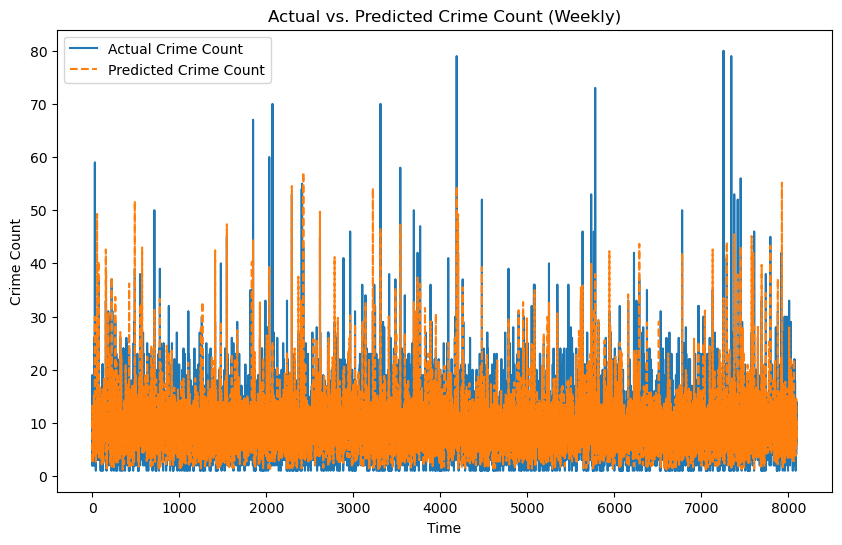

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Weekly)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

Mean Absolute Error: 2.9637901923666017
Root Mean Squared Error: 4.146034949634446
R² Score: 0.5998079776763916


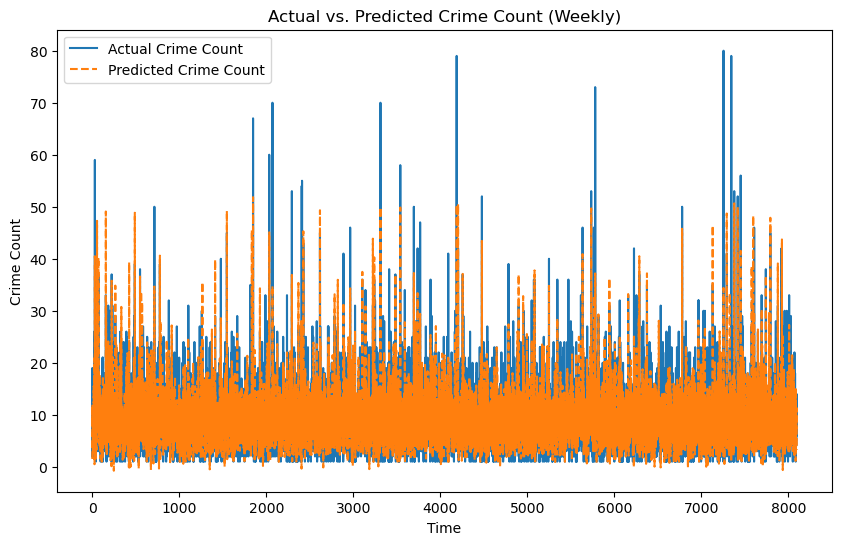

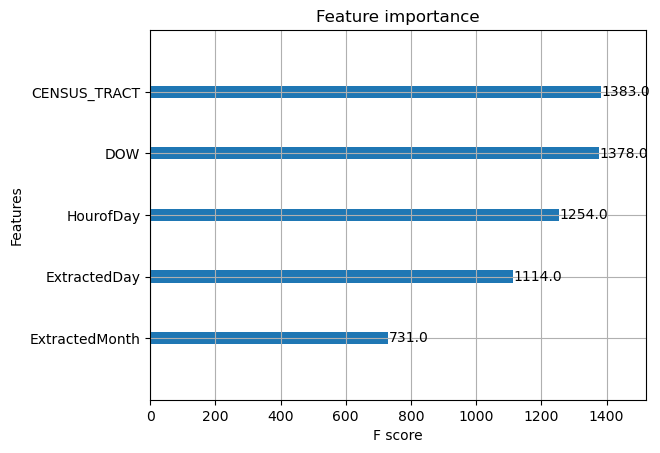

In [52]:
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Weekly)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

xgb.plot_importance(xgb_model)
plt.show()

In [53]:
# Step 3: Now group by 'CENSUS_TRACT' and resample using the 'OffenseDate' index
crime_time_series = crime.groupby(['CENSUS_TRACT', pd.Grouper(freq='D')]).agg({
    'DOW': 'first',  
    'HourofDay': 'first',
    'ExtractedMonth': 'first',
    'ExtractedDay': 'first',
}).reset_index()

# Step 4: Create the 'Crime_Count' feature based on size (count of crimes)
crime_time_series['Crime_Count_D'] = crime.groupby(['CENSUS_TRACT', pd.Grouper(freq='D')]).size().values

# Now the 'crime_time_series' contains the aggregated features and 'Crime_Count'
crime_time_series

,CENSUS_TRACT,OffenseDate,DOW,HourofDay,ExtractedMonth,ExtractedDay,Crime_Count_D
0,Census Tract 1011.01,2018-01-01,2,0,1,1,2
1,Census Tract 1011.01,2018-01-12,6,14,1,12,4
2,Census Tract 1011.01,2018-01-13,6,21,1,13,1
3,Census Tract 1011.01,2018-01-15,2,8,1,15,1
4,Census Tract 1011.01,2018-01-21,1,2,1,21,2
...,...,...,...,...,...,...,...
163820,Census Tract 9809,2022-11-24,4,22,11,24,2
163821,Census Tract 9809,2022-12-05,2,15,12,5,1
163822,Census Tract 9809,2022-12-14,4,6,12,14,3
163823,Census Tract 9809,2022-12-15,4,20,12,15,2


In [54]:
# feature encode CENSUS_TRACT
from sklearn.preprocessing import LabelEncoder

crime_time_series['CENSUS_TRACT'] = crime_time_series['CENSUS_TRACT'].apply(lambda x: str(x))

le = LabelEncoder()
crime_time_series['CENSUS_TRACT'] = le.fit_transform(crime_time_series['CENSUS_TRACT'])

In [55]:
from sklearn.model_selection import train_test_split

features = ['DOW', 'HourofDay', 'ExtractedMonth', 'ExtractedDay', 'CENSUS_TRACT']

X = crime_time_series[features]
y = crime_time_series['Crime_Count_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          Feature  Importance
3    ExtractedDay    0.262577
4    CENSUS_TRACT    0.215117
1       HourofDay    0.202118
2  ExtractedMonth    0.170234
0             DOW    0.149954
Mean Absolute Error: 1.257961544330841
Root Mean Squared Error: 1.7454529822457496
R² Score: 0.025445954589527364


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


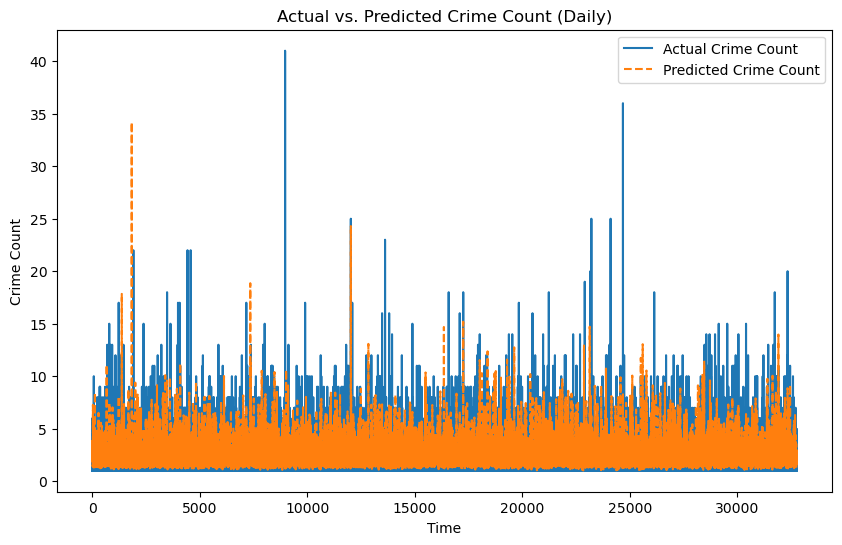

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Daily)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

Mean Absolute Error: 1.171502239076887
Root Mean Squared Error: 1.641825059862223
R² Score: 0.13772982358932495


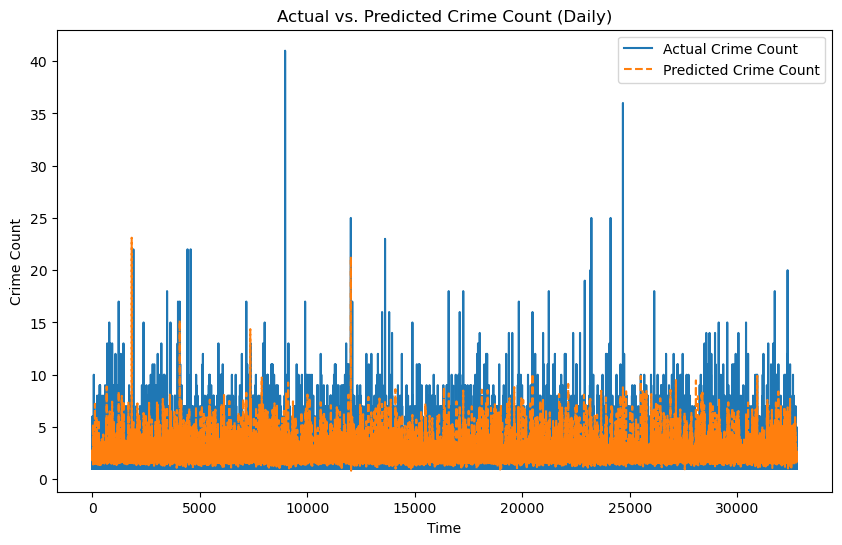

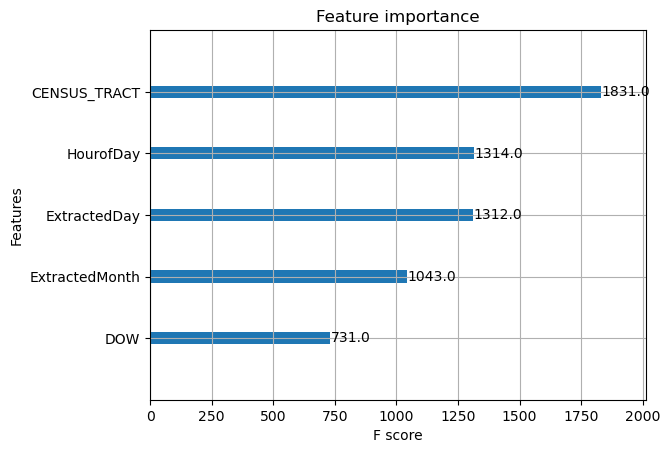

In [57]:
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Daily)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

xgb.plot_importance(xgb_model)
plt.show()